# Data 
## Chance Models

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('tools/')

import numpy as np
import pandas as pd
import math

# Graphing Libraries
import matplotlib.pyplot as pyplt
import seaborn as sns
sns.set_style("white")  

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

from IPython.display import display

### Uniform Sample
A uniform sample is a sample drawn at random without replacements

In [47]:
def sample(num_sample, top):
    """
    Create a random sample from a table
    
    Attributes
    ---------
    num_sample: int
    top: dataframe
    
    Returns a random subset of table index
    """
    df_index = []

    for i in np.arange(0, num_sample, 1):

        # pick randomly from the whole table
        sample_index = np.random.randint(0, len(top))

        # store index
        df_index.append(sample_index)
        
    return df_index

def sample_no_replacement(num_sample, top):
    """
    Create a random sample from a table
    
    Attributes
    ---------
    num_sample: int
    top: dataframe
    
    Returns a random subset of table index
    """
    df_index = []
    lst = np.arange(0, len(top), 1)

    for i in np.arange(0, num_sample, 1):

        # pick randomly from the whole table
        sample_index = np.random.choice(lst)

        lst = np.setdiff1d(lst,[sample_index])
        df_index.append(sample_index)
            
    return df_index



## Dice

In [48]:
die = pd.DataFrame()
die["Face"] = [1,2,3,4,5,6]

In [49]:
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


## Coin

In [50]:
coin = pd.DataFrame()
coin["Face"] = [1,2]
coin

,Face
0,1
1,2


We can simulate the act of rolling dice by just pulling out rows

In [51]:
index_ = sample(3, die)
df = die.ix[index_, :]
df

,Face
1,2
3,4
0,1


In [52]:
index_ = sample(1, coin)
df = coin.ix[index_, :]
df

,Face
0,1


In [53]:
def sum_draws( n, box ):
    """
    Construct histogram for the sum of n draws from a box with replacement
    
    Attributes
    -----------
    n: int (number of draws)
    box: dataframe (the box model)
    """
    data = numpy.zeros(shape=(n,1))
    if n > 0:
        for i in range(n):
            index_ = np.random.randint(0, len(box), n)
            df = box.ix[index_, :]
            data[i] = df.Content.sum()

        bins = np.arange(data.min()-0.5, data.max()+1, 1) 
        pyplt.hist(data, bins=bins, normed=True)
        pyplt.ylabel('percent per unit')
        pyplt.xlabel('Number on ticket')
        pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    else:
        raise ValueError('n has to be greater than 0')
    
        


In [54]:
box = pd.DataFrame()
box["Content"] = [0,1,2,3,4]

In [55]:
pyplt.rcParams['figure.figsize'] = (4, 3)

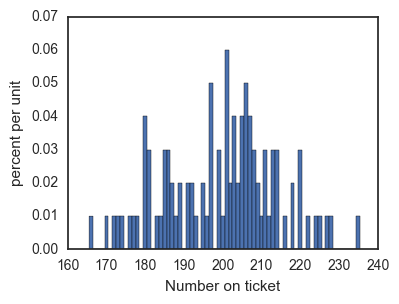

In [56]:
sum_draws(100, box)

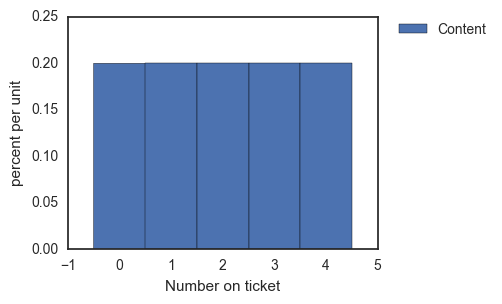

In [57]:
pyplt.rcParams['figure.figsize'] = (4, 3)

low, high = box.Content.min() - 0.5, box.Content.max() + 1
bins = np.arange(low, high, 1) 

box.plot.hist(bins=bins, normed=True)
pyplt.ylabel('percent per unit')
pyplt.xlabel('Number on ticket')
pyplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


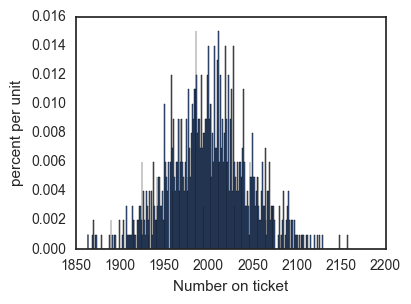

In [58]:
sum_draws(1000, box)

## Modeling the Law of Averages

The law of averages states that as the number of draws increases, so too does the difference between the *expected* average versus the *observed* average. 
$$ Chance \ Error = Observed - Expected $$
In the case of coin tosses, as the number of tosses goes up, so does the absolute chance error.

In [59]:
def number_of_heads( n, box ):
    """
    The number of heads in n tosses
    
    Attributes
    -----------
    n: int (number of draws)
    box: dataframe (the coin box model)
    """
    data = numpy.zeros(shape=(n,1))
    if n > 0:
        value = np.random.randint(0, len(box), n)
        data = value
    else:
        raise ValueError('n has to be greater than 0')
        
    return data.sum()


In [60]:
box = pd.DataFrame()
box["Content"] = [0,1]

In [78]:
low, high, step = 100, 10000, 2
length = len(range(low, high, step))
num_tosses = numpy.zeros(shape=(length,1))
num_heads = numpy.zeros(shape=(length,1))
chance_error = numpy.zeros(shape=(length,1))
percentage_difference = numpy.zeros(shape=(length,1))
i= 0

for n in range(low, high, step):
    observed = number_of_heads(n, box)
    expected = n//2
    num_tosses[i] = n
    num_heads[i] = observed
    chance_error[i] = math.fabs(expected - observed)
    percentage_difference[i] = math.fabs(((num_heads[i] / num_tosses[i]) * 100) - 50)
    i += 1
    

In [79]:
avg_heads = pd.DataFrame(index= range(low, high, step) )
avg_heads['num_tosses'] = num_tosses
avg_heads['num_heads'] = num_heads
avg_heads['chance_error'] = chance_error
avg_heads['percentage_difference'] = percentage_difference

avg_heads.reset_index(inplace=True)

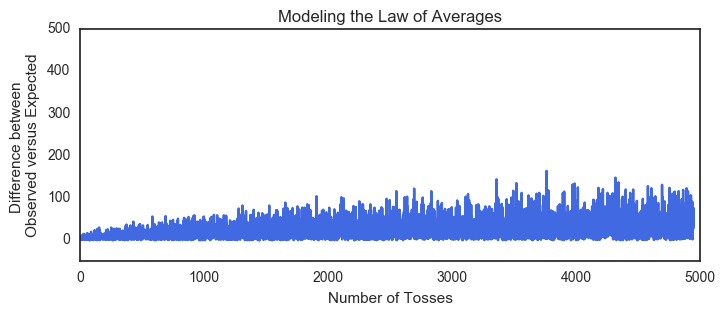

In [80]:
pyplt.rcParams['figure.figsize'] = (8, 3)
pyplt.plot(avg_heads.chance_error, 'royalblue')
pyplt.ylim(-50, 500)
pyplt.title('Modeling the Law of Averages')
pyplt.ylabel('Difference between \nObserved versus Expected')
pyplt.xlabel('Number of Tosses');

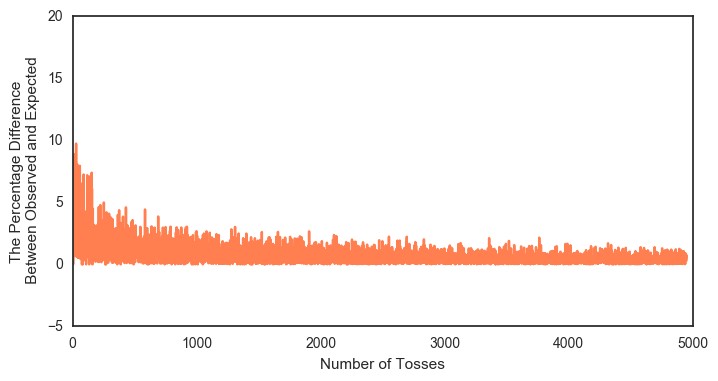

In [81]:
pyplt.rcParams['figure.figsize'] = (8, 4)
ax = pyplt.plot(avg_heads.percentage_difference, 'coral')
pyplt.ylim(-5, 20)
pyplt.ylabel('The Percentage Difference\n Between Observed and Expected')
pyplt.xlabel('Number of Tosses');

In [42]:
pyplt.rcParams['figure.figsize'] = (4, 3)

## Chance Processes

To figure out to what extent numbers are influenced by chance processes, it is good to make an analogy to a box model with its sum of draws.